# Finding the Best Markets to Advertise In

In this project we will use data from different markets to find out which is the best choice for advertising.

So, lets import libraries and read data.

In [1]:
import pandas as pd

In [2]:
survey_data= pd.read_csv("2017-fCC-New-Coders-Survey-Data.csv")
print(survey_data.shape)
survey_data.head(5)

(18175, 136)


/dataquest/system/env/python3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (17,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


I am using data from online resources because if we initiate our own survey then it will take time and its more expensive so I am using ready-made data.

The Data set can be downloaded from this [git-hub repository](https://github.com/freeCodeCamp/2017-new-coder-survey)

In [4]:
survey_data.columns

Index(['Age', 'AttendedBootcamp', 'BootcampFinish', 'BootcampLoanYesNo',
       'BootcampName', 'BootcampRecommend', 'ChildrenNumber', 'CityPopulation',
       'CodeEventConferences', 'CodeEventDjangoGirls',
       ...
       'YouTubeFCC', 'YouTubeFunFunFunction', 'YouTubeGoogleDev',
       'YouTubeLearnCode', 'YouTubeLevelUpTuts', 'YouTubeMIT',
       'YouTubeMozillaHacks', 'YouTubeOther', 'YouTubeSimplilearn',
       'YouTubeTheNewBoston'],
      dtype='object', length=136)

As we mentioned earlier, most of the courses we offer are on web and mobile development, but we also cover many other domains, like data science, game development, etc. For the purpose of our analysis, we want to answer questions about a population of new coders that are interested in the subjects we teach. We'd like to know:

* Where are these new coders located.
* What are the locations with the greatest number of new coders.
* How much money new coders are willing to spend on learning.

Before starting to analyze the sample data we have, we need to clarify whether it's representative for our population of interest and it has the right categories of people for our purpose.

So now lets figure out whether the sample we have is representative for our population of interest.

In [8]:
survey_data['JobRoleInterest'].value_counts(normalize=True)*100

Full-Stack Web Developer                                                                                                                                                                                                   11.770595
  Front-End Web Developer                                                                                                                                                                                                   6.435927
  Data Scientist                                                                                                                                                                                                            2.173913
Back-End Web Developer                                                                                                                                                                                                      2.030892
  Mobile Developer                                                                  

In [11]:
interests_no_nulls = survey_data['JobRoleInterest'].dropna()
splitted_interests = interests_no_nulls.str.split(',')
splitted_interests

1                               [Full-Stack Web Developer]
2        [  Front-End Web Developer,  Back-End Web Deve...
3        [  Front-End Web Developer,  Full-Stack Web De...
4        [Full-Stack Web Developer,  Information Securi...
6                               [Full-Stack Web Developer]
9        [Full-Stack Web Developer,    Quality Assuranc...
11       [  DevOps / SysAdmin,    Data Scientist,  Info...
13       [Back-End Web Developer,  Full-Stack Web Devel...
14                              [Full-Stack Web Developer]
15                              [Full-Stack Web Developer]
16                              [Full-Stack Web Developer]
18       [Full-Stack Web Developer,    Front-End Web De...
19       [  Front-End Web Developer,    Mobile Develope...
21                                  [Information Security]
22                              [Full-Stack Web Developer]
23                                [Back-End Web Developer]
28                              [Full-Stack Web Develope

In [12]:
n_of_options = splitted_interests.apply(lambda x: len(x))
n_of_options.value_counts(normalize = True).sort_index() * 100

1     31.650458
2     10.883867
3     15.889588
4     15.217391
5     12.042334
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
11     0.185927
12     0.300343
13     0.028604
Name: JobRoleInterest, dtype: float64

In [13]:
n_of_options

1         1
2         5
3         3
4         5
6         1
9         6
11        4
13        3
14        1
15        1
16        1
18        4
19        4
21        1
22        1
23        1
28        1
29        4
30        2
31        1
32        3
33        2
34        2
35        4
37        2
40        6
41        1
42        1
43        3
52       12
         ..
18080     2
18081     3
18088     1
18089     1
18090     7
18093     2
18097     4
18098     2
18099     1
18107     1
18111     2
18112     5
18113     2
18118     3
18125     2
18129     1
18130     6
18131     3
18151     1
18153     2
18154     1
18155     2
18156     1
18157     6
18160     1
18161     1
18162     3
18163     4
18171    13
18174     3
Name: JobRoleInterest, Length: 6992, dtype: int64

The focus of our courses is on web and mobile development. To get answer for "How many people are interested in at least one of these two subjects?"

In [14]:
web_or_mobile = interests_no_nulls.str.contains(
    'Web Developer|Mobile Developer')
freq_table = web_or_mobile.value_counts(normalize = True) * 100
print(freq_table)

True     86.241419
False    13.758581
Name: JobRoleInterest, dtype: float64


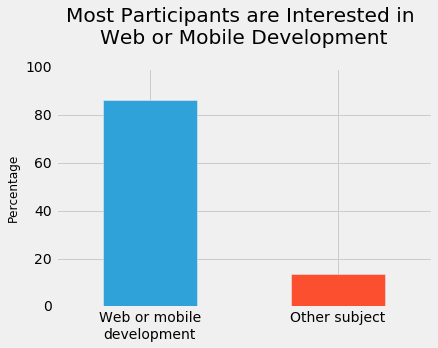

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

freq_table.plot.bar()
plt.title('Most Participants are Interested in \nWeb or Mobile Development',
          y = 1.08)

plt.ylabel('Percentage', fontsize = 12)
plt.xticks([0,1],['Web or mobile\ndevelopment', 'Other subject'],
           rotation = 0)
plt.ylim([0,100])
plt.show()

Almost 86% of population interested in our focused subjects.

Now that we found out that the sample has the right categories of people for our purpose, we can begin analyzing it. We can start with finding out where these new coders are located, and what are the densities (how many coderes there are) for each location.

The data set provides information about the location of each participant at a country level. The CountryCitizen variable describes the country of origin for each participant, and the CountryLive variable describes what country each participants lives in (which may be different than the origin country).

For our analysis, we'll work with the CountryLive variable because we're interested where people actually live at the moment when we run the ads. In other words, we're interested where people are located, not where they were born.

Because the data set provides information at a country level, we can think of each country as an individual market. This means we can frame our goal as finding the two best countries to advertise in.

One indicator of a good market is the number of potential customers — the more potential customers in a market, the better. If our ads manage to convince 10% of the 5000 potential customers in market A to buy our product, then this is better than convincing 100% of the 30 potential customers in market B.

In [18]:
good_survey=survey_data[survey_data['JobRoleInterest'].notnull()].copy()

In [21]:
absolute_frequencies = good_survey['CountryLive'].value_counts()
relative_frequencies = good_survey['CountryLive'].value_counts(normalize = True) * 100

pd.DataFrame(data = {'Absolute frequency': absolute_frequencies, 
                     'Percentage': relative_frequencies}
            )

,Absolute frequency,Percentage
United States of America,3125,45.700497
India,528,7.721556
United Kingdom,315,4.606610
Canada,260,3.802281
Poland,131,1.915765
Brazil,129,1.886517
Germany,125,1.828020
Australia,112,1.637906
Russia,102,1.491664
Ukraine,89,1.301550


From this result I would choose United States of America and India for advertisement. But we need to find out more from analyzing data set.

In [20]:
good_survey['MonthsProgramming'].replace(0,1, inplace = True)
good_survey['money_per_month'] = good_survey['MoneyForLearning'] / good_survey['MonthsProgramming']
good_survey['money_per_month'].isnull().sum()

675

In [22]:

good_survey = good_survey[good_survey['money_per_month'].notnull()]
good_survey = good_survey[good_survey['CountryLive'].notnull()]
good_survey['CountryLive'].value_counts().head()

United States of America    2933
India                        463
United Kingdom               279
Canada                       240
Poland                       122
Name: CountryLive, dtype: int64

In [23]:
countries_mean = good_survey.groupby('CountryLive').mean()
countries_mean['money_per_month'][['United States of America',
                            'India', 'United Kingdom',
                            'Canada']]

CountryLive
United States of America    227.997996
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: money_per_month, dtype: float64

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


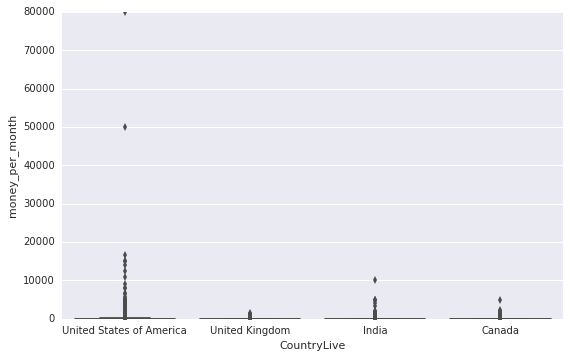

In [24]:
import seaborn as sns

only_4 = good_survey[good_survey['CountryLive'].str.contains(
    'United States of America|India|United Kingdom|Canada')]
sns.boxplot(y = 'money_per_month', x = 'CountryLive',
            data = only_4)

In [25]:
only_4 = only_4.drop([1728,1755])

In [26]:
only_4[
    (only_4['CountryLive'] == 'United States of America') & 
    (only_4['money_per_month'] > 6000)]

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,money_per_month
718,26.0,1.0,0.0,0.0,The Coding Boot Camp at UCLA Extension,1.0,NaN,more than 1 million,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
1222,32.0,1.0,0.0,0.0,The Iron Yard,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,6500.000000
2478,38.0,1.0,0.0,1.0,NaN,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50000.000000
3184,34.0,1.0,1.0,0.0,We Can Code IT,1.0,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9000.000000
3930,31.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,NaN,various conf presentations,NaN,NaN,10833.333333
6805,46.0,1.0,1.0,1.0,Sabio.la,0.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15000.000000
7198,32.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,1.0,NaN,...,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,14000.000000
7505,26.0,1.0,0.0,1.0,Codeup,0.0,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,6666.666667
9778,33.0,1.0,0.0,1.0,Grand Circus,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
14024,45.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,80000.000000
